<a href="https://colab.research.google.com/github/fundaylncii/MachineLearning/blob/main/TelcoChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics  import accuracy_score,classification_report,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate
from sklearn.neighbors import LocalOutlierFactor,KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [51]:

pd.set_option("display.max_columns", None)
pd.set_option("display.max_row",None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

In [52]:
df_ = pd.read_csv("/content/Telco-Customer-Churn.csv")
df = df_.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [53]:
## Keşifci veri analizi:
print(df.shape)
print("----------------------------------")
print(df.info())
print("----------------------------------")
print(df.describe().T)
print("----------------------------------")
print(df.isnull().sum())


(7043, 21)
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 

In [54]:
df["TotalCharges"] = df["TotalCharges"].replace(' ', np.nan).astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:

def grap_col_names(dataframe, cat_th= 10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [56]:
cat_cols, num_cols, cat_but_car = grap_col_names(df)
print(cat_cols)
print(num_cols)
print(cat_but_car)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']
['tenure', 'MonthlyCharges', 'TotalCharges']
['customerID']


In [57]:
cat_cols = [col for col in cat_cols if "Churn" not in col]
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


In [58]:
## Aykırı Dğerler var mı ?
def outlier_threshold (dataframe, col_name, q1=0.05, q3=0.95):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit


def check_outlier(dataframe, col_name):
  low_limit , up_limit =  outlier_threshold(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False


In [59]:
for col in num_cols:
  print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


In [ ]:
## Aykırı değerler yok.

In [60]:
df.drop("customerID", axis=1, inplace=True)

In [61]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes


        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
################################################################################


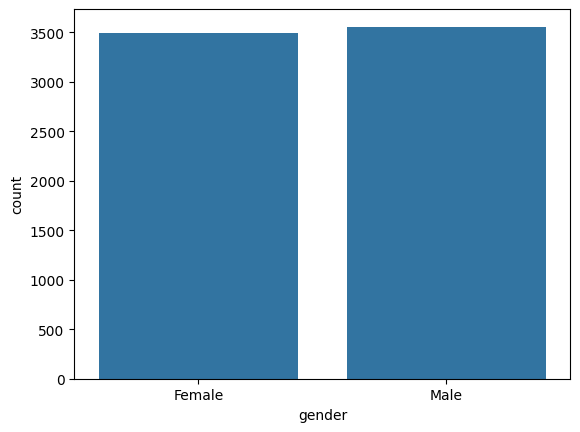

         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
################################################################################


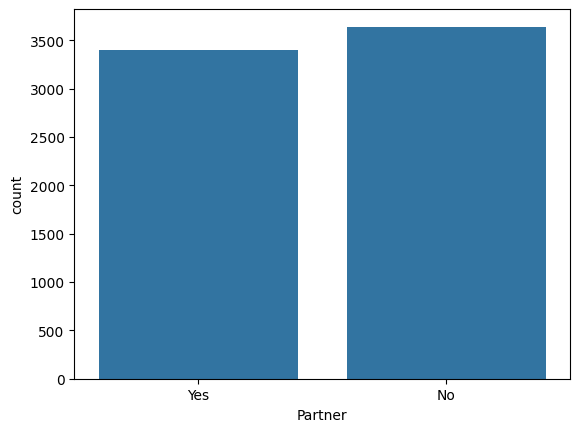

            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
################################################################################


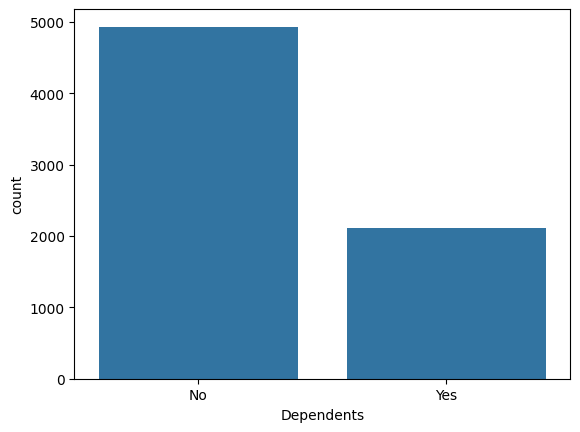

              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
################################################################################


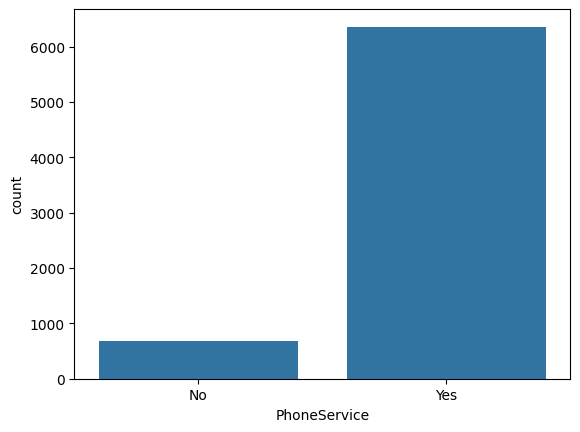

                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
################################################################################


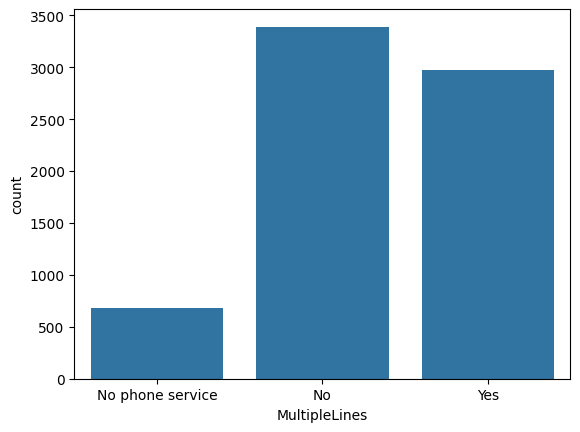

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 43.959
DSL                         2421 34.375
No                          1526 21.667
################################################################################


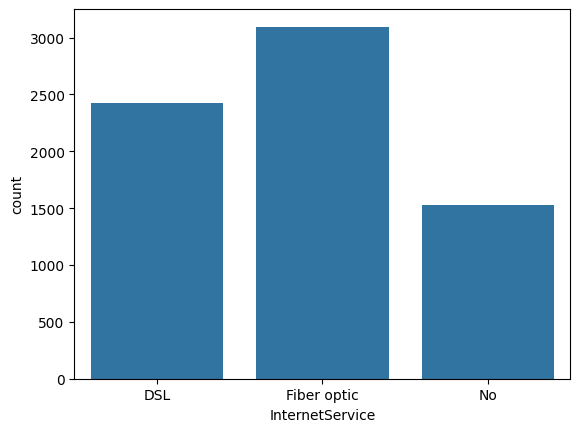

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
################################################################################


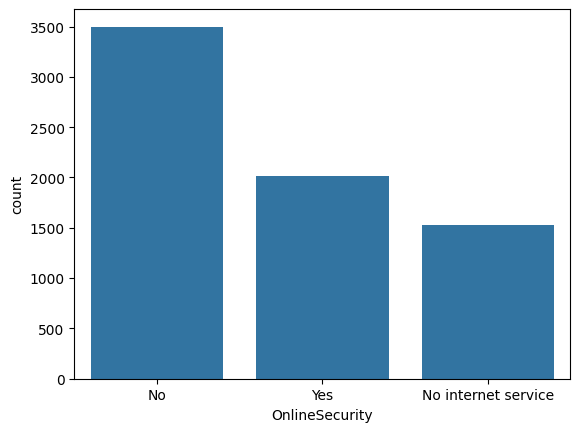

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
################################################################################


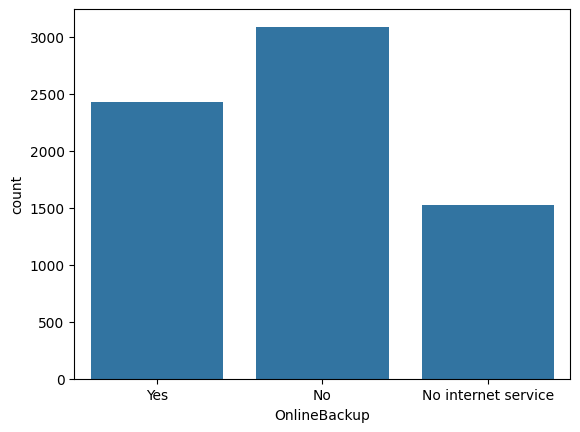

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
################################################################################


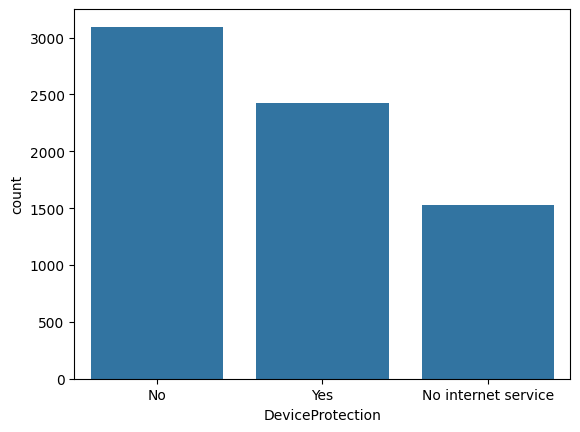

                     TechSupport  Ratio
TechSupport                            
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
################################################################################


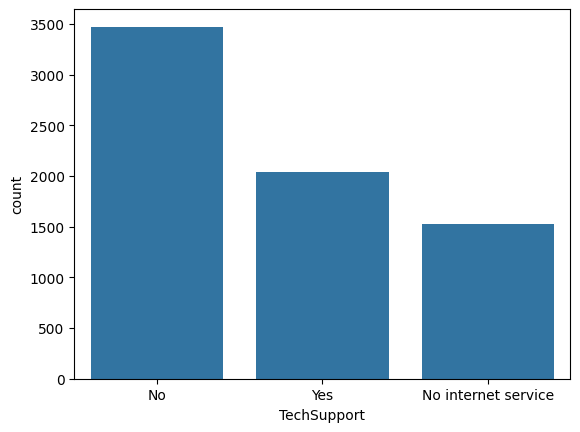

                     StreamingTV  Ratio
StreamingTV                            
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
################################################################################


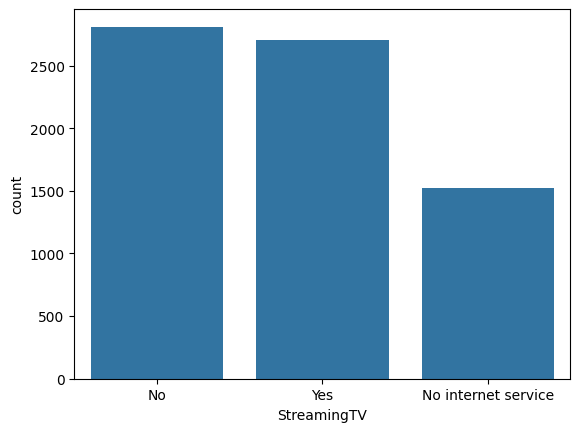

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
################################################################################


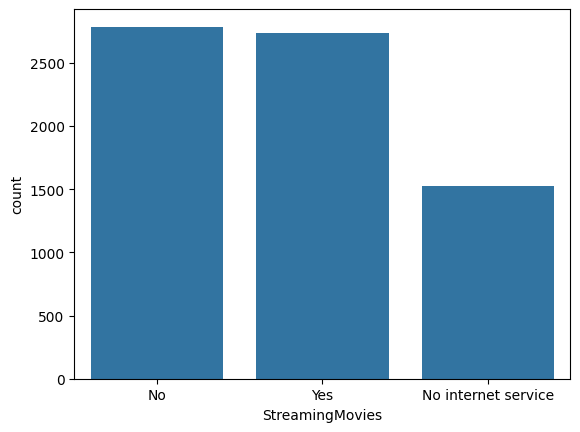

                Contract  Ratio
Contract                       
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
################################################################################


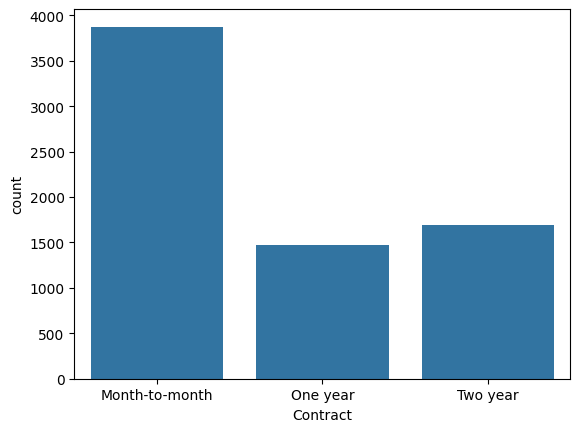

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171 59.222
No                            2872 40.778
################################################################################


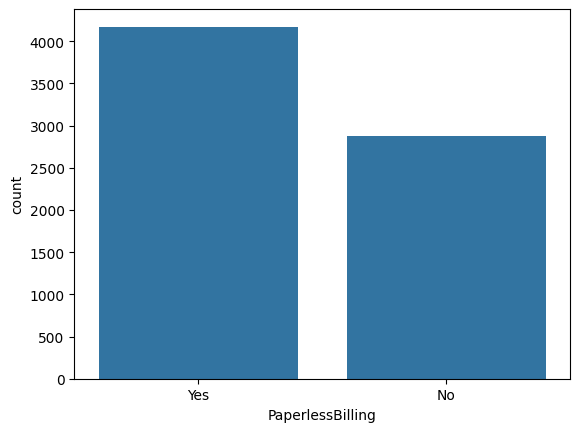

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
################################################################################


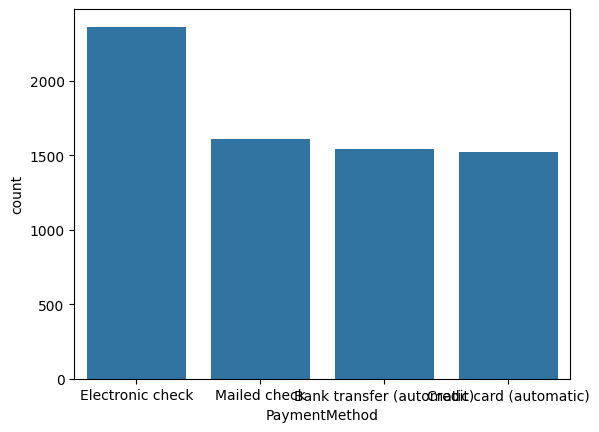

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215
################################################################################


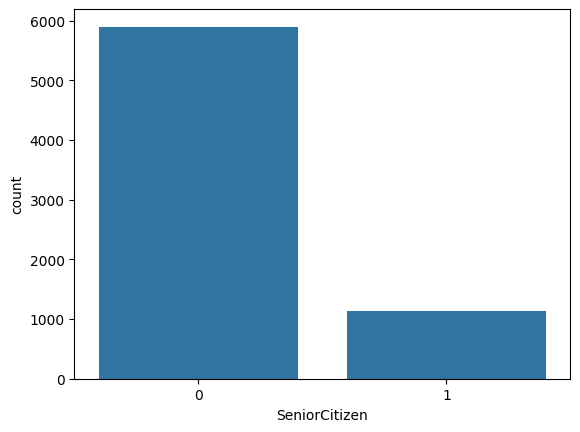

In [62]:
## kategorik değişkenlerin analizi:

def cat_summary(dataframe, col_name, plot= False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("################################################################################")
  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.show()

for col in cat_cols:
  cat_summary(df,col,True)

In [63]:
## bağımlı değişkene göre kategorik değişken analizi:

def target_summary_with_cat(dataframe, target, cat_col, plot=False):
    print(f"======================= {col.upper()} =======================")
    print(df.groupby([cat_col, target]).agg(Churn_Count=("Churn", "count"),
                                              Churn_Ratio=("Churn", lambda x: 100 * x.value_counts() / len(df))))
    if plot:
        sns.countplot(x=cat_col, hue=target, data=dataframe, palette="viridis")
        plt.show(block=True)

======================= GENDER =======================
              Churn_Count  Churn_Ratio
gender Churn                          
Female No            2549       36.192
       Yes            939       13.332
Male   No            2625       37.271
       Yes            930       13.205


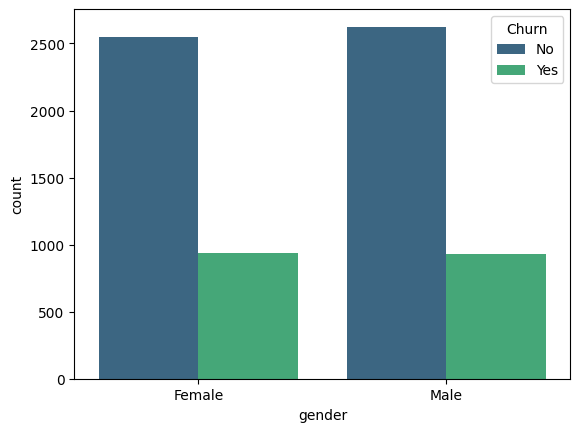

======================= PARTNER =======================
               Churn_Count  Churn_Ratio
Partner Churn                          
No      No            2441       34.659
        Yes           1200       17.038
Yes     No            2733       38.804
        Yes            669        9.499


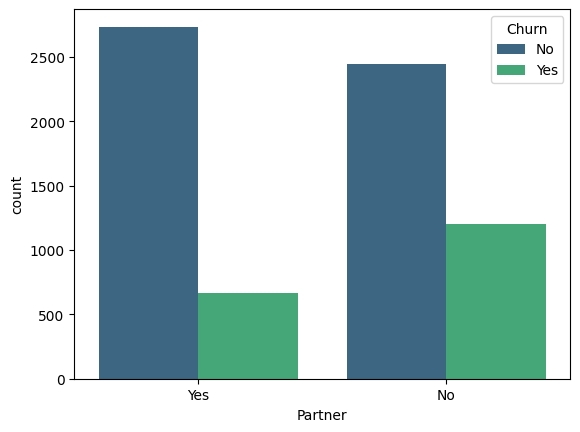

======================= DEPENDENTS =======================
                  Churn_Count  Churn_Ratio
Dependents Churn                          
No         No            3390       48.133
           Yes           1543       21.908
Yes        No            1784       25.330
           Yes            326        4.629


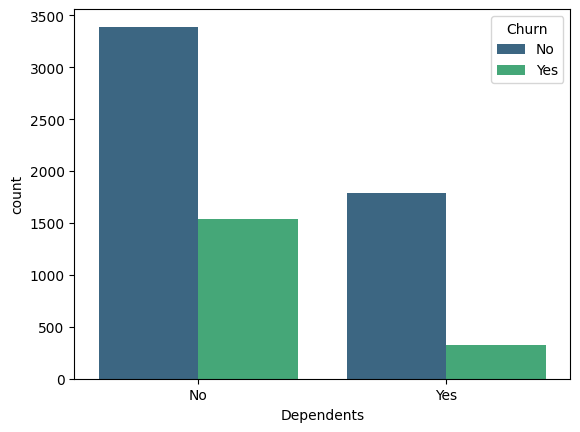

======================= PHONESERVICE =======================
                    Churn_Count  Churn_Ratio
PhoneService Churn                          
No           No             512        7.270
             Yes            170        2.414
Yes          No            4662       66.193
             Yes           1699       24.123


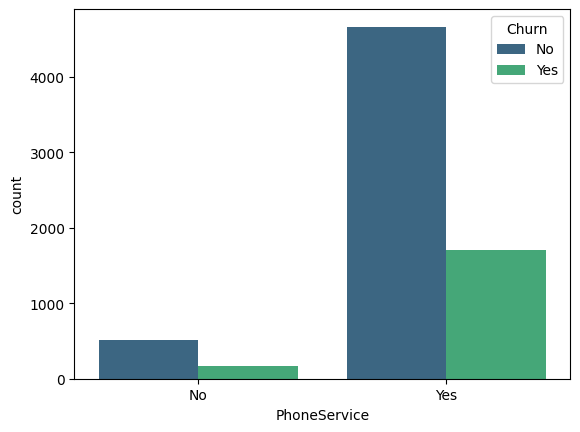

======================= MULTIPLELINES =======================
                        Churn_Count  Churn_Ratio
MultipleLines    Churn                          
No               No            2541       36.078
                 Yes            849       12.055
No phone service No             512        7.270
                 Yes            170        2.414
Yes              No            2121       30.115
                 Yes            850       12.069


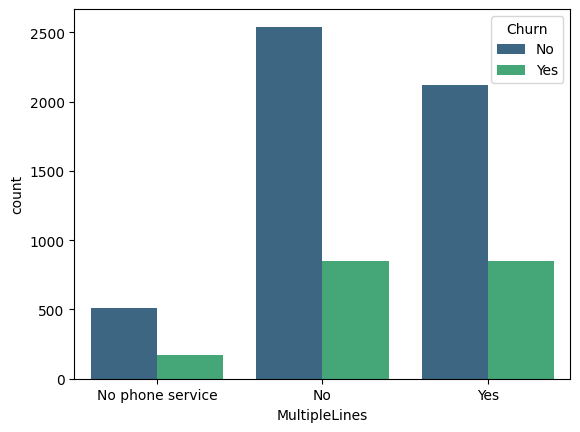

======================= INTERNETSERVICE =======================
                       Churn_Count  Churn_Ratio
InternetService Churn                          
DSL             No            1962       27.857
                Yes            459        6.517
Fiber optic     No            1799       25.543
                Yes           1297       18.415
No              No            1413       20.062
                Yes            113        1.604


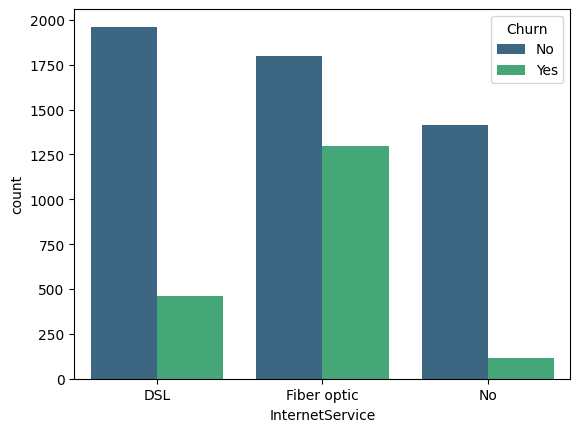

======================= ONLINESECURITY =======================
                           Churn_Count  Churn_Ratio
OnlineSecurity      Churn                          
No                  No            2037       28.922
                    Yes           1461       20.744
No internet service No            1413       20.062
                    Yes            113        1.604
Yes                 No            1724       24.478
                    Yes            295        4.189


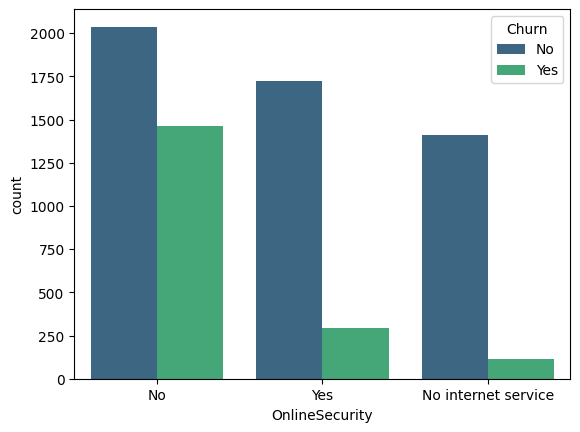

======================= ONLINEBACKUP =======================
                           Churn_Count  Churn_Ratio
OnlineBackup        Churn                          
No                  No            1855       26.338
                    Yes           1233       17.507
No internet service No            1413       20.062
                    Yes            113        1.604
Yes                 No            1906       27.062
                    Yes            523        7.426


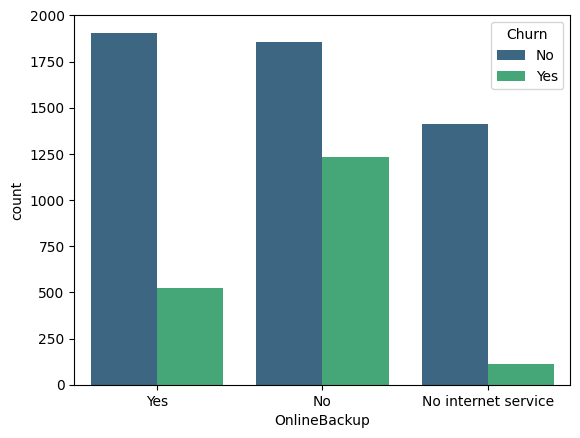

======================= DEVICEPROTECTION =======================
                           Churn_Count  Churn_Ratio
DeviceProtection    Churn                          
No                  No            1884       26.750
                    Yes           1211       17.194
No internet service No            1413       20.062
                    Yes            113        1.604
Yes                 No            1877       26.651
                    Yes            545        7.738


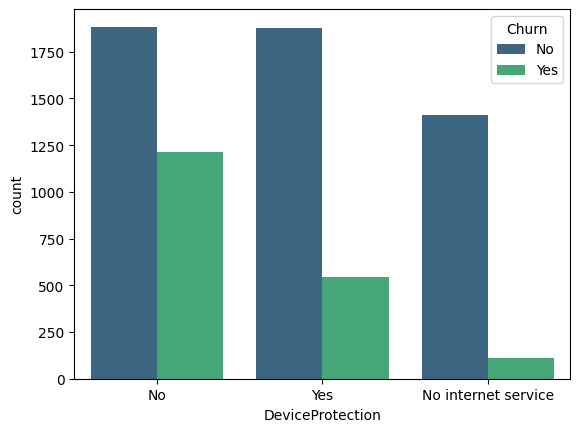

======================= TECHSUPPORT =======================
                           Churn_Count  Churn_Ratio
TechSupport         Churn                          
No                  No            2027       28.780
                    Yes           1446       20.531
No internet service No            1413       20.062
                    Yes            113        1.604
Yes                 No            1734       24.620
                    Yes            310        4.402


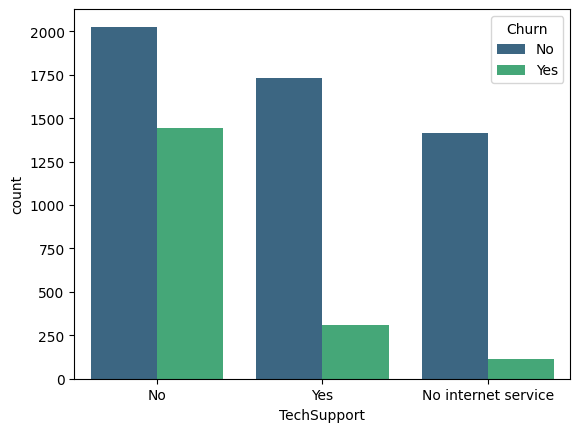

======================= STREAMINGTV =======================
                           Churn_Count  Churn_Ratio
StreamingTV         Churn                          
No                  No            1868       26.523
                    Yes            942       13.375
No internet service No            1413       20.062
                    Yes            113        1.604
Yes                 No            1893       26.878
                    Yes            814       11.558


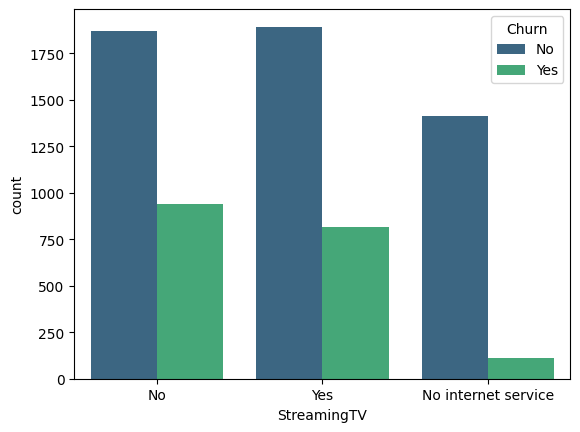

======================= STREAMINGMOVIES =======================
                           Churn_Count  Churn_Ratio
StreamingMovies     Churn                          
No                  No            1847       26.225
                    Yes            938       13.318
No internet service No            1413       20.062
                    Yes            113        1.604
Yes                 No            1914       27.176
                    Yes            818       11.614


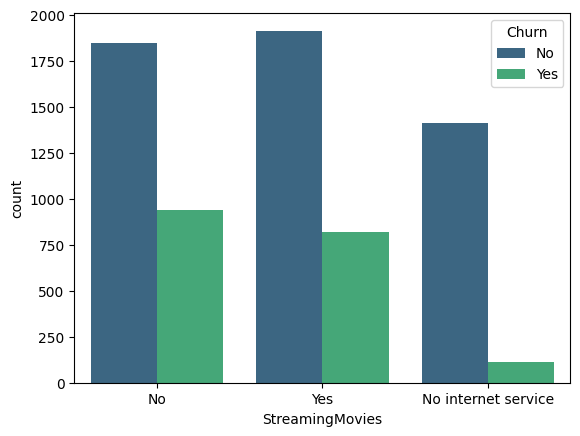

======================= CONTRACT =======================
                      Churn_Count  Churn_Ratio
Contract       Churn                          
Month-to-month No            2220       31.521
               Yes           1655       23.499
One year       No            1307       18.557
               Yes            166        2.357
Two year       No            1647       23.385
               Yes             48        0.682


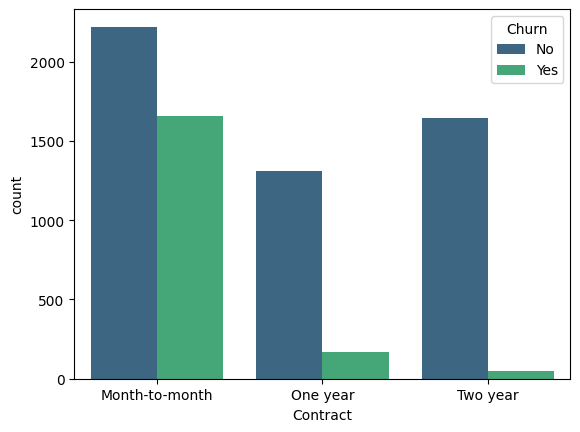

======================= PAPERLESSBILLING =======================
                        Churn_Count  Churn_Ratio
PaperlessBilling Churn                          
No               No            2403       34.119
                 Yes            469        6.659
Yes              No            2771       39.344
                 Yes           1400       19.878


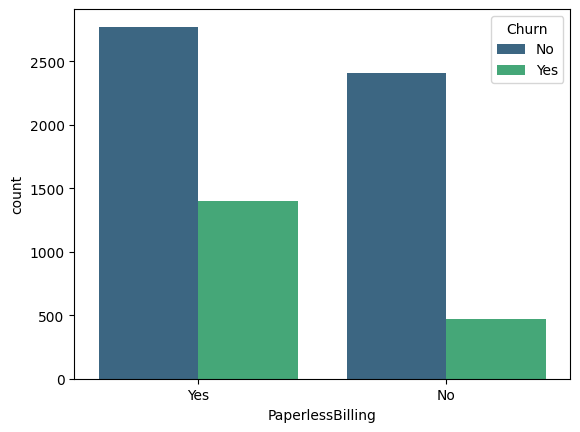

======================= PAYMENTMETHOD =======================
                                 Churn_Count  Churn_Ratio
PaymentMethod             Churn                          
Bank transfer (automatic) No            1286       18.259
                          Yes            258        3.663
Credit card (automatic)   No            1290       18.316
                          Yes            232        3.294
Electronic check          No            1294       18.373
                          Yes           1071       15.207
Mailed check              No            1304       18.515
                          Yes            308        4.373


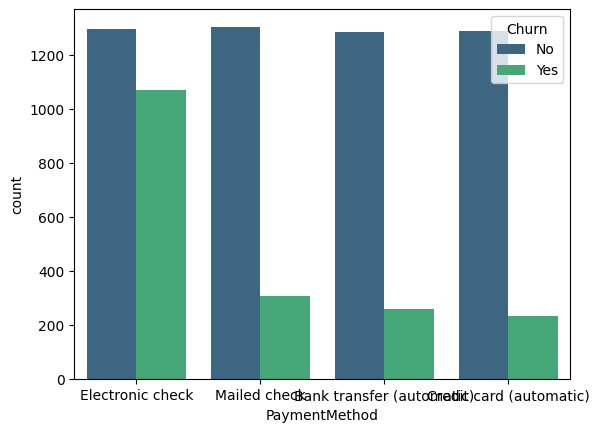

======================= SENIORCITIZEN =======================
                     Churn_Count  Churn_Ratio
SeniorCitizen Churn                          
0             No            4508       64.007
              Yes           1393       19.779
1             No             666        9.456
              Yes            476        6.758


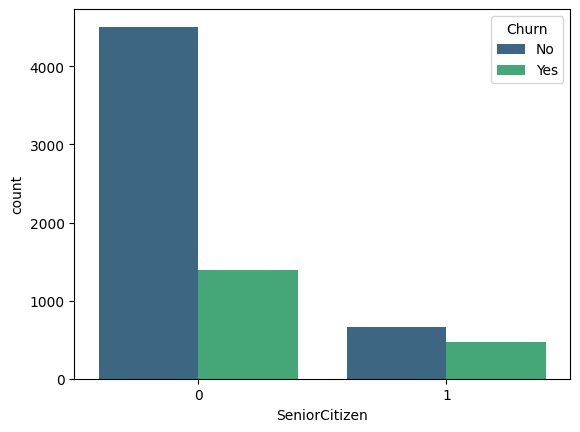

In [64]:
for col in cat_cols:
    target_summary_with_cat(df,"Churn",col,plot=True)

In [65]:
def missing_values_table(dataframe,na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0 ]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=["n_miss","ratio"])
    if len(missing_df > 0 ):
        print(missing_df, end="\n")
    else:
        print("Eksik değişken yoktur.")
    if na_name:
        return na_columns

In [66]:
missing_values_table(df)

              n_miss  ratio
TotalCharges      11  0.160


In [67]:
df = df.loc[~df["TotalCharges"].isnull()]

In [68]:
## Yeni değişkenlerin Oluşturulması:

def cal_service_num(row):
    services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
                 "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
                 "StreamingMovies"]
    service_num = 0
    for service in services:
        if row[service] not in ["No", "No internet service", "No phone service"]:
            service_num += 1
    return service_num

df["TotalServiceNum"] = df.apply(lambda row: cal_service_num(row), axis=1)

df["TotalServiceNumCategory"] = pd.qcut(df["TotalServiceNum"], q=3, labels=["Low", "Medium", "High"])

df["CustomerCategory"] = pd.qcut(df["tenure"], q=3, labels=["NewCustomer", "MindTermCustomer", "LongTermCustomer"])

df["MonthlyChargesCategory"] = pd.qcut(df["MonthlyCharges"], q=3, labels=["Low", "Medium", "High"])

df["HasMultipleOnlineServices"] = df[["OnlineSecurity", "OnlineBackup"]].apply(lambda x: 1 if sum(x == "Yes") > 1 else 0, axis=1)

df["HasMultipleStreming"] = df[["StreamingTV", "StreamingMovies"]].apply(lambda x: 1 if sum(x == "Yes") > 1 else 0, axis=1)

df["PhoneAndInternet"] = df[["PhoneService", "InternetService"]].apply(lambda x: 1 if x["PhoneService"] == "Yes" and x["InternetService"] != "No" else 0, axis=1)

df["ChargeDifference"] = df["TotalCharges"] / df["tenure"] - df["MonthlyCharges"]

df["CLV"] = df["MonthlyCharges"] * df["tenure"]

df["RoundedValues"] = np.floor(df["TotalCharges"] / df["tenure"])

df["AdditionaLService"]= df["TotalCharges"] - df["CLV"]

In [69]:
## tekrar grap_col_name uygulanır

cat_cols,num_cols,cat_but_car = grap_col_names(df)
print(cat_cols)
print(num_cols)
print(cat_but_car)

Observations: 7032
Variables: 31
cat_cols: 24
num_cols: 7
cat_but_car: 0
num_but_cat: 8
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen', 'TotalServiceNum', 'TotalServiceNumCategory', 'CustomerCategory', 'MonthlyChargesCategory', 'HasMultipleOnlineServices', 'HasMultipleStreming', 'PhoneAndInternet']
['tenure', 'MonthlyCharges', 'TotalCharges', 'ChargeDifference', 'CLV', 'RoundedValues', 'AdditionaLService']
[]


In [85]:
lb = LabelEncoder()
df["Churn"] = lb.fit_transform(df["Churn"])
df["Churn"].unique()
lb.inverse_transform(df["Churn"].unique())

array(['No', 'Yes'], dtype=object)

In [70]:
## Encoding işlemleri:

cat_cols = [col for col in cat_cols if col not in ["Churn"]]

def one_hot_encoding(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, dtype="Int32",columns=categorical_cols,drop_first=drop_first)
    return dataframe

In [71]:
df = one_hot_encoding(df,cat_cols)

In [86]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,ChargeDifference,CLV,RoundedValues,AdditionaLService,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,TotalServiceNum_2,TotalServiceNum_3,TotalServiceNum_4,TotalServiceNum_5,TotalServiceNum_6,TotalServiceNum_7,TotalServiceNum_8,TotalServiceNum_9,TotalServiceNumCategory_Medium,TotalServiceNumCategory_High,CustomerCategory_MindTermCustomer,CustomerCategory_LongTermCustomer,MonthlyChargesCategory_Medium,MonthlyChargesCategory_High,HasMultipleOnlineServices_1,HasMultipleStreming_1,PhoneAndInternet_1
0,0.000,0.115,0.001,0,0.503,0.001,0.148,0.498,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.465,0.385,0.216,0,0.467,0.225,0.389,0.435,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1
2,0.014,0.354,0.010,1,0.509,0.010,0.380,0.499,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1
3,0.620,0.239,0.210,0,0.466,0.221,0.250,0.414,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,0.014,0.522,0.015,1,0.638,0.014,0.574,0.512,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [87]:
## Sayısal Değerler için standarlaştırma yapılır:

scalers = MinMaxScaler()
df[num_cols] = scalers.fit_transform(df[num_cols])
df.head()


,tenure,MonthlyCharges,TotalCharges,Churn,ChargeDifference,CLV,RoundedValues,AdditionaLService,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,TotalServiceNum_2,TotalServiceNum_3,TotalServiceNum_4,TotalServiceNum_5,TotalServiceNum_6,TotalServiceNum_7,TotalServiceNum_8,TotalServiceNum_9,TotalServiceNumCategory_Medium,TotalServiceNumCategory_High,CustomerCategory_MindTermCustomer,CustomerCategory_LongTermCustomer,MonthlyChargesCategory_Medium,MonthlyChargesCategory_High,HasMultipleOnlineServices_1,HasMultipleStreming_1,PhoneAndInternet_1
0,0.000,0.115,0.001,0,0.503,0.001,0.148,0.498,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.465,0.385,0.216,0,0.467,0.225,0.389,0.435,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1
2,0.014,0.354,0.010,1,0.509,0.010,0.380,0.499,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1
3,0.620,0.239,0.210,0,0.466,0.221,0.250,0.414,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,0.014,0.522,0.015,1,0.638,0.014,0.574,0.512,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [88]:
## Modelleme

y = df["Churn"]
X = df.drop("Churn", axis=1)

knn_model = KNeighborsClassifier().fit(X,y)

In [89]:
random_user =  X.sample(1, random_state=45)
print(random_user)

      tenure  MonthlyCharges  TotalCharges  ChargeDifference   CLV  RoundedValues  AdditionaLService  gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  MultipleLines_Yes  InternetService_Fiber optic  InternetService_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  \
2287   0.958           0.897         0.842             0.441 0.875          0.861              0.281            1            1               0                 1                               0                  1                            1                   0                                   0                   0                                 0                 1                                     0                     1                                0                1   

      StreamingTV_No internet servi

In [90]:
knn_model.predict(random_user)

array([0])

In [91]:
y_pred = knn_model.predict(X)

In [92]:
y_prob = knn_model.predict_proba(X)

In [93]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5163
           1       0.71      0.64      0.67      1869

    accuracy                           0.83      7032
   macro avg       0.79      0.77      0.78      7032
weighted avg       0.83      0.83      0.83      7032



In [94]:
cv_resuld = cross_validate(knn_model, X, y, cv=5, scoring=["accuracy","f1","roc_auc"])
print(cv_resuld)

{'fit_time': array([0.02836275, 0.06065607, 0.0528388 , 0.07782412, 0.11556935]), 'score_time': array([0.9795711 , 1.08807325, 1.33075047, 0.87268972, 1.0201354 ]), 'test_accuracy': array([0.7803838 , 0.77540867, 0.76315789, 0.77382646, 0.77382646]), 'test_f1': array([0.56540084, 0.56473829, 0.55060729, 0.55710306, 0.55833333]), 'test_roc_auc': array([0.78549058, 0.79388081, 0.76617728, 0.77619906, 0.77278168])}


In [95]:
print(cv_resuld["test_accuracy"].mean())
print(cv_resuld["test_f1"].mean())
print(cv_resuld["test_roc_auc"].mean())

0.7733206554102077
0.5592365641484909
0.7789058812784813


In [96]:
## Hiperparametre optimizasyonu:

knn_model = KNeighborsClassifier()
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [97]:
knn_params = {"n_neighbors": np.arange(2,50)}

In [98]:
knn_gs_best = GridSearchCV(knn_model,
             knn_params,
             cv=5,
             n_jobs=-1,
             verbose=1).fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [99]:
knn_gs_best.best_params_

{'n_neighbors': 14}

In [100]:
## Final model:

knn_final = KNeighborsClassifier(n_neighbors=12).fit(X,y)

In [101]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X,y)

In [102]:

cv_resuld = cross_validate(knn_final,
                           X,
                           y,
                           cv=5,
                           scoring=["accuracy","f1","roc_auc"])
print(cv_resuld["test_accuracy"].mean())
print(cv_resuld["test_f1"].mean())
print(cv_resuld["test_roc_auc"].mean())

0.7930881054997315
0.5693553920809706
0.8170662712238667


In [103]:
random_user =  X.sample(1)
print(random_user)

      tenure  MonthlyCharges  TotalCharges  ChargeDifference   CLV  RoundedValues  AdditionaLService  gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  MultipleLines_Yes  InternetService_Fiber optic  InternetService_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  \
3945   0.028           0.159         0.014             0.824 0.010          0.306              0.548            0            0               0                 0                               1                  0                            0                   0                                   0                   1                                 0                 0                                     0                     0                                0                1   

      StreamingTV_No internet servi

In [104]:
knn_final.predict(random_user)

array([0])